# Cross-validation for NN classification on Wine data set

In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load data set
raw_data = np.loadtxt('wine.data.txt', delimiter=',')

## Split the train and test data set
data = raw_data[:, 1:]
labels = raw_data[:, 0]

In [26]:
print(data[0])
print(labels[0])
print("Training dataset dimensions: ", np.shape(data))
print("Number of training labels: ", len(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
1.0
Training dataset dimensions:  (178, 13)
Number of training labels:  178


## Method 1: hand-made Interpretation

### Question 1

In [35]:
## Computes the Euclidean distance between two vectors.
def l2_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [36]:
## Takes a vector x and returns the index of its nearest neighbor in train_data
def l2_find_NN(x, X, Y):
    # Compute distances from x to every row in train_data
    l2_distances = [l2_dist(x, X[i,]) for i in range(len(Y))]
    # Get the index of the smallest distance
    return np.argmin(l2_distances)

## Takes a vector x and returns the class of its nearest neighbor in train_data
def l2_NN_classifier(x, X, Y):
    # Get the index of the the nearest neighbor
    index = l2_find_NN(x, X, Y)
    # Return its class
    return Y[index]

## LOOCV Implementation
def loocv_knn(data, labels):
    n_samples = len(data)
    y_pred = []
    
    # Each turn: take i as test data
    for i in range(n_samples):
        # Split the train and test data set
        test_idx = i
        train_idx = [j for j in range(n_samples) if j != i]

        X = data[train_idx]
        Y= labels[train_idx]
        
        # Calculate the prediction
        pred = l2_NN_classifier(data[test_idx], X, Y)
        y_pred.append(pred)
    
    return np.array(y_pred)


In [37]:
y_prediction = loocv_knn(data, labels)
print(y_prediction)

[1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 1.
 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 3. 2. 1. 2.
 3. 1. 1. 2. 2. 3. 1. 2. 2. 3. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 3. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2. 3. 3. 1. 3. 3.
 1. 1. 2. 3. 3. 2. 2. 2. 2. 2. 2. 3. 3. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2.
 3. 3. 3. 2. 2. 3. 3. 3. 3. 3.]


In [38]:
## Compute the error
accurate_positions = np.equal(y_prediction, labels)
accuracy = float(np.sum(accurate_positions))/len(labels)

print("Accuracy of nearest neighbor classifier: ", accuracy)

Accuracy of nearest neighbor classifier:  0.7696629213483146


[[52  3  4]
 [ 5 54 12]
 [ 3 14 31]]


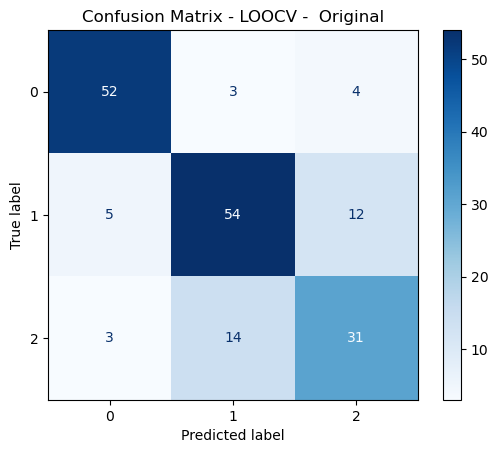

In [64]:
# Construct the confusion matrix
N = confusion_matrix(labels, y_prediction)
print(N)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=N, display_labels=range(3))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LOOCV -  Original")

plt.show()

### Question 2

In [ ]:
## 过于复杂，还没实现
# 手动实现 k-fold cross-validation
def cross_val_score_1nn_manual(X, y, k_folds):
    n_samples = len(X)
    fold_sizes = [n_samples // k_folds] * k_folds
    for i in range(n_samples % k_folds):
        fold_sizes[i] += 1

    # 创建 fold 划分索引
    current = 0
    folds = []
    for size in fold_sizes:
        start, stop = current, current + size
        folds.append((start, stop))
        current = stop

    correct = 0
    total = 0

    for i in range(k_folds):
        # 当前为验证集，其余为训练集
        val_start, val_end = folds[i]
        val_X = X[val_start:val_end]
        val_y = y[val_start:val_end]
        train_X = np.concatenate([X[:val_start], X[val_end:]])
        train_y = np.concatenate([y[:val_start], y[val_end:]])

        for j in range(len(val_X)):
            pred = predict_1nn(train_X, train_y, val_X[j])
            if pred == val_y[j]:
                correct += 1
            total += 1

    return correct / total

# 选择 20 个不同的 k 值（均匀分布在 2~100 之间）
k_values = np.linspace(2, 100, 20, dtype=int)
accuracies = []

for k in k_values:
    acc = cross_val_score_1nn_manual(X, y, k)
    accuracies.append(acc)

# 画图
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.title("1-NN Accuracy vs k-fold Cross-Validation (fully manual)")
plt.grid(True)
plt.show()

## Method 2: Import Sklearn

### Question 1

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [43]:
model = KNeighborsClassifier(n_neighbors=1)

loo = LeaveOneOut()

## Inplement LOOCV
y_true = []
y_pred = []
for train_idx, test_idx in loo.split(data):
    X_train, X_test = data[train_idx], data[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    
    y_true.append(y_test[0])
    y_pred.append(pred[0])

accuracy = accuracy_score(y_true, y_pred)

## Print Result
print(list(zip(y_true[:10], y_pred[:10])))
print("LOOCV Accuracy:", accuracy)

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 2.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]
LOOCV Accuracy: 0.7696629213483146


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[52  3  4]
 [ 5 54 12]
 [ 3 14 31]]


### Question 2

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

## Choose 20 k values that fairly well spread out across the range 2 to 100
k_values = np.linspace(2, 100, 20, dtype=int)
accuracies = []

for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(knn, data, labels, cv=cv)
    accuracies.append(scores.mean())

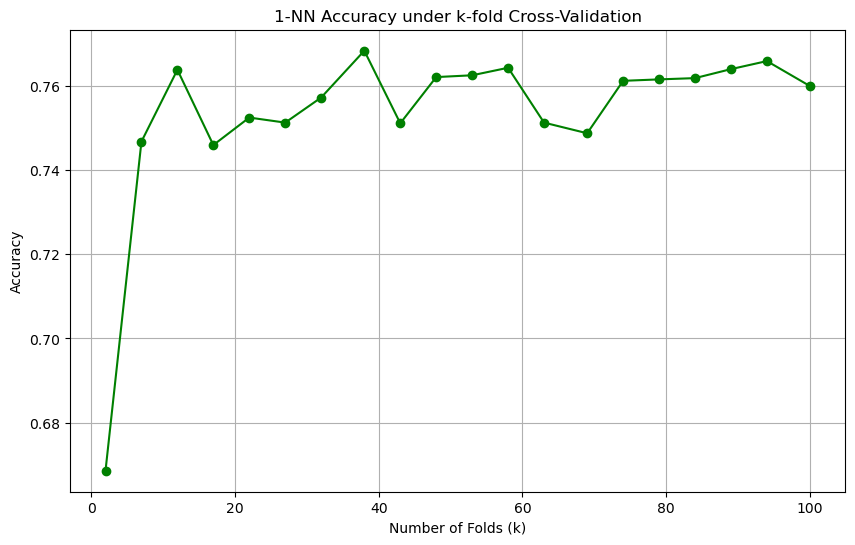

In [66]:
## Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.title("1-NN Accuracy under k-fold Cross-Validation")
plt.grid(True)
plt.show()

### Question 3

In [ ]:
def normalize(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    # Avoid devided by 0 while X_max = X_min
    denominator = X_max - X_min
    denominator[denominator == 0] = 1
    X_normalized = (X - X_min) / denominator
    return X_normalized

In [68]:
print(data)
print(normalize(data))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [69]:
model = KNeighborsClassifier(n_neighbors=1)

loo = LeaveOneOut()

## Inplement LOOCV
y_true = []
y_pred = []
X = normalize(data)
for train_idx, test_idx in loo.split(normalize(data)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]
    
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    
    y_true.append(y_test[0])
    y_pred.append(pred[0])

normalize_accuracy = accuracy_score(y_true, y_pred)

## Print Result
print(list(zip(y_true[:10], y_pred[:10])))
print("LOOCV Accurac After Normalizing features:", normalize_accuracy)

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]
LOOCV Accurac After Normalizing features: 0.949438202247191


[[59  0  0]
 [ 5 62  4]
 [ 0  0 48]]


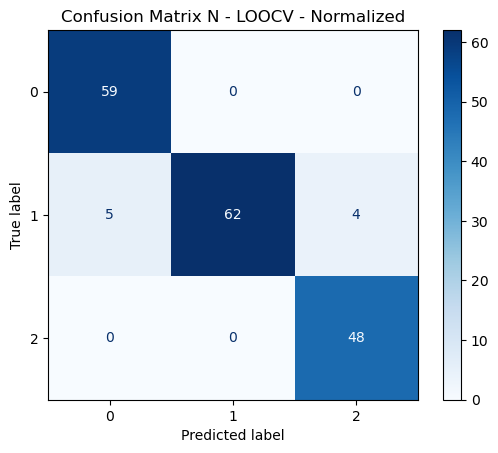

In [63]:
N = confusion_matrix(y_true, y_pred)
print(N)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=N, display_labels=range(3))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix N - LOOCV - Normalized")

plt.show()